# Learning goals
After this week's lesson you should be able to:
- Create points, lines, and polygons from coordinate values. 
- Test these geometries for certain `True` and `False` conditions
- Analyze geometries and output new geometries 

This week's lessons are adapted from:
- [Automating GIS Processes Lesson 1](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-1/overview.html)
- [The Shapely Documentation](https://shapely.readthedocs.io/en/stable/manual.html)
- [Spatial Data Programming with Python](https://geobgu.xyz/)

# Grading
Each exercise will be graded based on the following rubrics:
- 5 points. Completed all the tasks and codes were well documented and explained.
- 4 points. Completed all the tasks with minor mismatch with the expected results (less than 10%).
- 3 points. Completed all the tasks with some mismatch with the expected results (more than 10% but less than 50%).
- 2 points. Completed all the tasks with major mismatch with the expected results (over 50%).
- 1 point. Made an attempt but didn’t finish any of the exercises.
- 0 point. Did not complete the excercise.

For late submission, every extra day after the due date will lead to 20% off of your points. Less than a day will be counted as one day. All submissions after the TA team posts the answers will not be accepted.

# 0. What is shapely? 

Shapely is a Python package for the analysis and manipulation of planar features. It performs the many of the core spatial functionalities used in Geopandas (which we'll explore on Wednesday), so it's worth reviewing this library. Because shapely is built using functions from libraries that are guided by the [Open Geospatial Consortium](https://www.ogc.org/) geospatial standards, its GIS conventions will be familiar to you since you are all familiar with manipulating and analyzing geospatial data in ArcGIS.

*I thought we were going to use GeoPandas for geospatial data?* When we learn about GeoPanda on Wednesday, you'll see that the geometries in Geopandas are just shapely geometries, so everything you can do in shapely, you can also do with the Geopandas geometries. 

# 1. Geometric Objects
There are three kinds of geometric objects found in Shapely: 
- **points**
- **lines**: Connecting points together creates a line
- **polygons**: Connecting lines in an enclosed area creates a polygon. 

These are all the different categories of possible geometric objects in Shapely. 
<figure class="image">
<img src="https://autogis-site.readthedocs.io/en/latest/_images/simple-features_595x500px.svg" alt="drawing" width="500" style="display: block; margin: 0 auto"/>
 <figcaption><center>(Figures by M. W. Toews; cf. Wikipedia’s article on GeoJSON)</figcaption>
</figure>

Let's look at some geometry objects.

## 1.1 Points
Points are represented by a single coordinate are defined using the `Point` class.

(Note, Jacob may not have gone over this, but a class is a way of creating Python objects. It's often described as a "blueprint" for creating other Python objects. )

In [2]:
from shapely.geometry import Point
point1 = Point(2.2, 4.2)

Now if you just call the variable, it will be displayed in our notebook

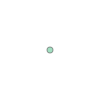

In [3]:
point1

## 1.2 LineStrings
The `LineString` class is used to construct lines through a sequence of points. 

In [4]:
# import the LineString class
from shapely.geometry import LineString

# Create a LineString from our Point objects
line1 = LineString([(1,2), (4,10), (12,4)])

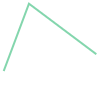

In [5]:
line1

If we "close" the LineString by setting the first and as point to be the same, we create a LinearRing. 

In [6]:
line2 = LineString([(1,2), (4,10), (12,4),(1,2)])

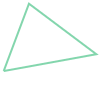

In [7]:
line2

## 1.3 Polygons
From the above, we can see that a polygon is just one or more LinearRings (you can have a polygon with a hole in the middle, which would require two LinearRings). 

In [8]:
# import the LineString class
from shapely.geometry import Polygon

# Create a LineString from our Point objects
polygon1 = Polygon([(1,2), (4,10), (12,4),(1,2)])

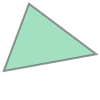

In [9]:
polygon1

These geometric objects are all built by **coordinate tuples**, or pairs of numbers taking represented by `(x,y)` or, when we have are using a coordinate reference system `(lng,lat)`. The tuple is a built-in python data types. 

One thing to note about shapely is that coordinates are **only exist on the 2-dimensional plane**. If you have third z-coordinate, shapely will essentially ignore this dimension and perform all operations as if your geometries only exist on the x-y plane. 


## 1.4 Collections of geometric objects
Points, lines, and polygons can be combined into a collection of geometric objects: MultiPoint, MultiLineString, MultiPolygon. 

In [10]:
# import the LineString class
from shapely.geometry import MultiPolygon

# Create a LineString from our Point objects
polygon2 = MultiPolygon([Polygon([(1,2), (4,10), (12,4),(1,2)]),
                        Polygon([(18,10), (16,4), (12,12),(18,10)])])

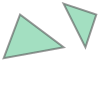

In [11]:
# Fun!
polygon2

## 1.5 Geometry attributes

There are some basic attributes that you'll want to know about our geometries such as (where relevant), 
- Coordinates
- Distance
- Area
- Length
- The type of geometry
- etc

Below are some attributes you can get from each our three (Points, LineStrings, Polygons) types of geometric objects


### 1.5.1 Points
To see the coordinates, any of the following can work

In [12]:
list(point1.coords)

[(2.2, 4.2)]

In [13]:
point1.x

2.2

In [14]:
point1.y

4.2

In [15]:
print(point1)

POINT (2.2 4.2)


In [16]:
# You can use this but it returns 0. 
point1.area

0.0

In [17]:
point1.length

0.0

`object.bounds` will return the bounding box, i.e. a (minx, miny, maxx, maxy) tuple that bounds the object.

In [18]:
point1.bounds

(2.2, 4.2, 2.2, 4.2)

In [19]:
point1.geom_type

'Point'

### 1.5.2 LineStrings

In [20]:
list(line1.coords)

[(1.0, 2.0), (4.0, 10.0), (12.0, 4.0)]

In [21]:
line1.area

0.0

In [22]:
line1.length

18.544003745317532

In [23]:
line1.bounds

(1.0, 2.0, 12.0, 10.0)

### 1.5.3 Polygons

Note that because polygons have an exterior and any number of interiors (holes), you sometimes need to specify which part of the polygon you are try to access.

In [24]:
list(polygon1.exterior.coords)

[(1.0, 2.0), (4.0, 10.0), (12.0, 4.0), (1.0, 2.0)]

In [25]:
polygon1.area

41.0

Length here is the perimenter. 

In [26]:
polygon1.length

29.72434363281648

In [27]:
polygon1.bounds

(1.0, 2.0, 12.0, 10.0)

In [28]:
polygon1.is_valid

True

### 1.5.4 Geometry validity
There are proper and improper ways that a geometry can be constructed, which you can check with the `.is_valid` property. 


In [29]:
polygon1.is_valid

True

For **LinearRings**, a geometry is invalid if it shares any point besides the first/last one: 
<figure class="image">
<img src="https://shapely.readthedocs.io/en/stable/code/linearring.png" alt="drawing" width="500" style="display: block; margin: 0 auto"/>
 <figcaption><center>(Figures from the Shapely documentation)</figcaption>
</figure>


For **Polygons**, an interior ring is allowed to share only a single a point with the exterior. And interior rings cannot touch along a line.
<figure class="image">
<img src="https://shapely.readthedocs.io/en/stable/code/polygon.png" alt="drawing" width="500" style="display: block; margin: 0 auto"/>
 <figcaption><center>(Figures from the Shapely documentation)</figcaption>
</figure>
<img src="https://shapely.readthedocs.io/en/stable/code/polygon2.png" alt="drawing" width="500" style="display: block; margin: 0 auto"/>
 <figcaption><center>(Figures from the Shapely documentation)</figcaption>
</figure>

For **LineStrings**, when lines cross each other, they are still valid, but are called "complex"

</figure>
<img src="https://shapely.readthedocs.io/en/stable/code/linestring.png " alt="drawing" width="500" style="display: block; margin: 0 auto"/>
 <figcaption><center>(Figures from the Shapely documentation)</figcaption>
</figure>


# 2. Relationships
Now that we've built an understanding of geometries themselves, I'll show a few common methods of analysis. 

Let's take a look at predicates, or methods we can use on geometries to check for `True` or `False` conditions. 

(`.is_valid` above is one example)

In [30]:
a = LineString([(0, 0), (1, 1)])
b = LineString([(0, 0), (0.5, 0.5), (1, 1)])
c = LineString([(0, 0), (0, 0), (1, 1)])


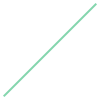

In [31]:
a

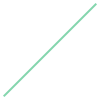

In [32]:
b

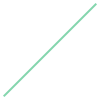

In [33]:
c

`geom.equals(another_geom)` is `True` if the two geometries are the same. 

In [34]:
a.equals(b)

True

In [35]:
b.equals(c)


True

`geom.contains(another_geom)` is `True` if the geometry `geom` contains `another_geom`

`geom.within(another_geom)`is `True` if the geometry `geom` is contained by `another_geom`

You may be familiar with these concepts from Intro to GIS. 

In [61]:
point_inside =Point(1,1)
container_polygon = Polygon([(0, 0), (0, 2), (2, 2), (2, 0),(0,0)])


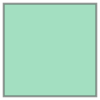

In [62]:
container_polygon

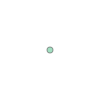

In [64]:
point_inside

In [65]:
container_polygon.contains(point_inside)

True

`geom.intersects(another_geom)` returns `True` if one geometry intersects another one. 

In [66]:
polygon3 = Polygon([(0, 0), (0, 2), (2, 2), (2, 0),(0,0)])
polygon4 = Polygon([(1, 1), (1, 2), (2, 2), (2, 0),(1,1)])

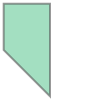

In [67]:
polygon4

# 3. Spatial Analysis Methods
There are also functions in shapely that allow us analyze geometries and return new geometries> 

`.boundary` returns the "border" of a geometry. If the geometry is a polygon, this method will return the border (a line), if the geometry is a line, this method will return a collection of points. If the geometry is a point, this method will return an empty result. 

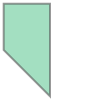

In [71]:
polygon4

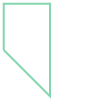

In [69]:
polygon4.boundary

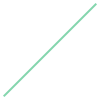

In [72]:
a

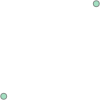

In [70]:
a.boundary

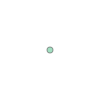

In [73]:
point_inside

In [74]:
point_inside.boundary

`.centroid` returns the center point of an object. 

<figure class="image">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/Triangle.Centroid.svg/440px-Triangle.Centroid.svg.png" alt="drawing" width="300" style="display: block; margin: 0 auto"/>
 <figcaption><center>(From Wikipedia)</figcaption>
</figure>


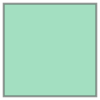

In [77]:
polygon5 = Polygon([(0, 0), (0, 2), (2, 2), (2, 0),(0,0)])
polygon5

The centroid of the 2x2 square above is (1,1)

In [81]:
list(polygon5.centroid.coords)

[(1.0, 1.0)]

`.difference` returns the parts of the geometry that do not make up parts of the other geometry

In [88]:
# .buffer() creates a polygon around a point
# if we use .buffer() on a point, it creates a circle
a = Point(1, 1).buffer(1.5)
# notice that the second circle has a different center point
b = Point(2, 1).buffer(1.5)


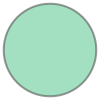

In [85]:
a

Notice 

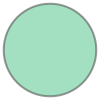

In [86]:
b

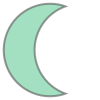

In [87]:
a.difference(b)

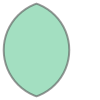

In [89]:
a.intersection(b)

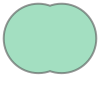

In [90]:
a.union(b)

`.convex_hull` returns the smallest convex `Polygon` containing the geometry unless the number of points in the object is less than three (i.e. doesn't make a shape with area). 

For two points, this method produces a line. For one point, this method produces a point. 

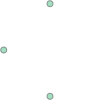

In [101]:
from shapely.geometry import MultiPoint
multipoint1 = MultiPoint([(0, 0), (1, 1), (1, -1)])
multipoint1

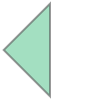

In [100]:
multipoint1.convex_hull

# 4. Exercises

As a reminder (or if you're encountering this for the first time), here is how we write a function in Python: 


In [116]:
# To create a function we use the def keyword: 
# The return keyword is used to return a value from a function
# Docstrings are used to document functions
# Docstrings are surrounded by triple double quotes
# They are optional but highly recommended

def add_two_numbers(x, y):
    """This function performs addition of two numbers
    input: x, y (numbers)
    """
    return x + y

add_two_numbers(1, 2)

3

In [117]:
# The variable names are arbitrary, but they should be descriptive and consistent withing the function
def add_two_numbers(any_var_name1, any_var_name2):
    """This function performs addition of two numbers
    input: arbitrary, any_var_name2 (numbers)
    """
    return any_var_name1 + any_var_name2

In [113]:
# Docstrings can be accessed using the help() function
help(add_two_numbers)

Help on function add_two_numbers in module __main__:

add_two_numbers(x, y)
    This function performs addition on two numbers
    input: x, y (numbers)



## 4.1 Exercise 1 (5 points)

Create a function called `create_point_geom()` that has two parameters (x_coord, y_coord). Function should create a shapely Point geometry object and return that. Demonstrate the usage of the function by creating 3 point geometries with the function.

In [114]:
def create_point_geom(x, y):
    """This function creates a point geometry
    input: x, y (numbers)
    """
    ## Insert your code here

## Don't forget to test your function

Create a function `get_x_coord()` that takes a shapely point object and returns the x coordinate of that point

In [118]:
def get_x_coord(geom):
    """This function returns the x coordinate of a point geometry
    input: geom (a point geometry)
    """
    ## Insert your code here

## Don't forget to test your function

Create a function called `getCentroid()` that takes any kind of Shapely’s geometry as input and returns a centroid of that geometry. Demonstrate the usage of the function.

In [119]:
## Insert your code here

Create a function called `getArea()` that takes a Shapely’s Polygon -object as input and returns the area of that geometry. Demonstrate the usage of the function.

In [120]:
## Insert your code here

## 4.2 Exercise 2 (5 points)
1. Create two geometries—a square and a circle—in such a way that they partially overlap, so that of the circle area overlaps with the square. Hint: use the `buffer()` function applied on a point geometry to create the circle.
2. Calculate and plot the geometry representing the union of the square and the circle.
<figure class="image">
<img src="https://geobgu.xyz/py/_images/exercise_solutions_shapely_14_0.svg" alt="drawing" width="100" style="display: block; margin: 0 auto"/>
</figure>
3. Calculate and plot the geometry representing the intersection of the square and the circle (Fig. 42).
<figure class="image">
<img src="https://geobgu.xyz/py/_images/exercise_solutions_shapely_16_0.svg" alt="drawing" width="100" style="display: block; margin: 0 auto"/>
</figure>
4. Calculate the area of the intersection and of the the union geometries.


## 4.3 Exercise 3 (5 points)
In the following exercise, we are going to use a subset of the [Bus Stop Shelters dataset from NYC OpenData](https://data.cityofnewyork.us/Transportation/Bus-Stop-Shelters/qafz-7myz) containing the locations of bus stops in Rockaway Beach.

For now, let's assume these locations make up one route.

In [164]:
import pandas as pd
bus_stops = pd.read_csv('Bus_Stop_Shelter_Rockaways.csv')
bus_stops = bus_stops.sort_values(['Longitude', 'Latitude'])

Let's look at the first 5 rows

In [170]:
# Insert your code here


,Unnamed: 0,the_geom,BoroCode,BoroName,BoroCD,CounDist,AssemDist,StSenDist,CongDist,Shelter_ID,Corner,On_Street,Cross_Stre,Longitude,Latitude,NTAName,FEMAFldz,FEMAFldT,HrcEvac
19,2759,POINT (-73.84784861080628 40.57611876479319),4,Queens,414,32,23,10,5,QN04567,NE,ROCKAWAY BEACH BLVD,BEACH 129 ST,-73.847850,40.576127,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,X,AREA OF MINIMAL FLOOD HAZARD,1.0
11,2418,POINT (-73.83838161278774 40.58131076382985),4,Queens,414,32,23,10,5,QN04159,SW,NEWPORT AV,BEACH 116 ST,-73.838383,40.581319,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,AE,NaN,1.0
3,2328,POINT (-73.8290056165102 40.58202976319081),4,Queens,414,32,23,10,5,QN04051,SE,ROCKAWAY BEACH BLVD,BEACH 108 ST,-73.829007,40.582038,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,X,AREA OF MINIMAL FLOOD HAZARD,1.0
4,2329,POINT (-73.8264796162047 40.58300576306968),4,Queens,414,32,23,10,5,QN04053,NW,ROCKAWAY BEACH BLVD,BEACH 105 ST,-73.826481,40.583014,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,X,AREA OF MINIMAL FLOOD HAZARD,1.0
2,2317,POINT (-73.82564861669952 40.5830027625186),4,Queens,414,32,23,10,5,QN04034,SE,ROCKAWAY BEACH BLVD,BEACH 105 ST,-73.825650,40.583011,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,X,AREA OF MINIMAL FLOOD HAZARD,1.0


Now, let's extract the `Longitude` and `Latitude` from this Pandas dataframe into a list of tuple coordinates. 

I will provide some code on how to loop through all the rows in the dataframe. 

Remember: x = long and y = lat


In [166]:
# First we are going to create an empty list
stops_as_coords = []

# Then, we are going to loop through the rows of the dataframe and extract the Long and Lat values as a tuple: 
for index, row in bus_stops.iterrows():
    # We are going to append the tuple to the list
    stops_as_coords.append((row['Longitude'], row['Latitude']))

In [167]:
# Voila
stops_as_coords

[(-73.84785, 40.576127),
 (-73.838383, 40.581319),
 (-73.829007, 40.582038),
 (-73.826481, 40.583014),
 (-73.82565, 40.583011),
 (-73.823539, 40.583859),
 (-73.823243, 40.583713),
 (-73.813181, 40.587175),
 (-73.809456, 40.587669),
 (-73.807734, 40.588109),
 (-73.806896, 40.587898),
 (-73.80534, 40.5881),
 (-73.802861, 40.588536),
 (-73.80004, 40.591838),
 (-73.796488, 40.592911),
 (-73.795784, 40.592783),
 (-73.785905, 40.594866),
 (-73.784939, 40.595143),
 (-73.784717, 40.594949),
 (-73.781451, 40.595374),
 (-73.781424, 40.595184),
 (-73.775375, 40.595618),
 (-73.772797, 40.595896),
 (-73.770176, 40.595974),
 (-73.756467, 40.595427),
 (-73.755541, 40.594991),
 (-73.753559, 40.609694),
 (-73.75352, 40.594941),
 (-73.75144, 40.59495),
 (-73.74961, 40.60267),
 (-73.744599, 40.596174),
 (-73.744211, 40.595975)]

Calculate and plot a `MultiPoint` geometry with all stop locations.

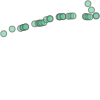

In [168]:
# Insert your code here



Calculate and plot a `LineString` geometry of the bus route


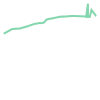

In [169]:
# Insert your code here


Calculate and plot a `LineString` geometry with the straight line between the first and last bus stops

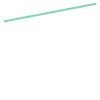

In [171]:
# Insert your code here


Calculate and plot the convex hull polygon of the bus stops

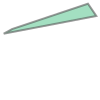

In [173]:
# Insert your code here
